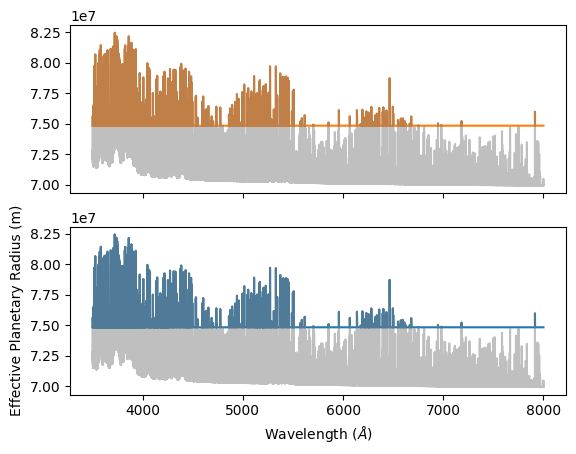

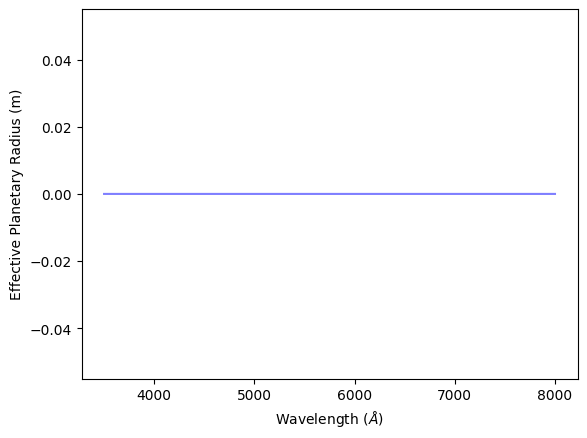

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

wl, sigma = np.load("/home/danny/exoplanet_atmospheres/notebooks/x_FeI_2500K_m2.npy")
chi_FeI = 1e-6

p_cloud = 0.01 * 1e5 #Pa
T = 3000 #K
P_0 = 10 * 1e5 #Pa

#Planet parameters
Rpl = const.R_jup.value
Mpl = 0.9 * const.M_jup.value
g = const.G.value * Mpl/(Rpl)**2
mmw = 2.3 * const.m_p.value

Hs = const.k_B.value * T/(mmw * g)

R_0 = Rpl 
gamma = 0.54

constant_beer = R_0 + Hs * (gamma + np.log(P_0 / g) - np.log(mmw) + 0.5*np.log(2.*np.pi*R_0/Hs) )



r_fe_beer = constant_beer + Hs * np.log(chi_FeI * sigma)

r_continuum_cloud = R_0 + Hs * np.log(P_0/p_cloud)

r_continuum_raleigh = 2.3e-31 * (43/wl)**4

# r_continuum_raleigh = 0

r_continuum = np.maximum(r_continuum_cloud, r_continuum_raleigh)

r = np.maximum(r_continuum, r_fe_beer)

r_no_raleigh = np.maximum(r_continuum_cloud, r_fe_beer)

fig, ax = plt.subplots(2, sharex= 'all')
ax[0].plot(wl, r, 'C1')
ax[0].plot(wl, r_fe_beer, '0.5', alpha = 0.5)
ax[1].set_xlabel(r'Wavelength $(\AA)$')
# ax[0].set_ylabel(r'Effective Planetary Radius (m)')
ax[1].plot(wl, r_no_raleigh, 'C0')
ax[1].plot(wl, r_fe_beer, '0.5', alpha = 0.5)
plt.ylabel('Effective Planetary Radius (m)')

fig, ax = plt.subplots(1, sharex= 'all')
ax.set_xlabel(r'Wavelength $(\AA)$')
ax.set_ylabel(r'Effective Planetary Radius (m)')
ax.plot(wl, r_no_raleigh - r, 'blue', alpha = 0.5)

# print(const.R_jup.value/const.R_sun.value)